## 第4周基础作业

1. 对连续型特征，可以用哪个函数可视化其分布？（给出你最常用的一个即可），并根据代码运行结果给出示例。（10分） 
2. 对两个连续型特征，可以用哪个函数得到这两个特征之间的相关性？根据代码运行结果，给出示例。（10分） 
3. 如果发现特征之间有较强的相关性，在选择线性回归模型时应该采取什么措施。（10分） 
4. 当采用带正则的模型以及采用随机梯度下降优化算法时，需要对输入（连续型）特征进行去量纲预处理。课程代码给出了用标准化（StandardScaler）的结果，请改成最小最大缩放（MinMaxScaler）去量纲 （10分），并重新训练最小二乘线性回归、岭回归、和Lasso模型（30分）。 
5. 代码中给出了岭回归（RidgeCV）和Lasso（LassoCV）超参数（alpha_）调优的过程，请结合两个最佳模型以及最小二乘线性回归模型的结果，给出什么场合应该用岭回归，什么场合用Lasso，什么场合用最小二乘。（30分） 

第一题： 对于连续性特征，可以使用describe方法可以特征的基本统计学特性，可以通过matplotlib、seaborn等画图可视化其分布,判断是否存在噪声数据点等，最常用的有直方图（seaborn的distplot）、散点图（matplotlib库的scatter()方法 或 seaborn库的jointplot方法）


In [3]:
#导入常用的工具包
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#是一个魔法函数（Magic Functions）。官方给出的定义是：IPython有一组预先定义好的所谓的魔法函数（Magic Functions），你可以通过命令行的语法形式来访问它们。
#由于 %matplotlib inline 的存在，当输入plt.plot(x,y_1)后，不必再输入 plt.show()，图像将自动显示出来
%matplotlib inline

In [6]:
# 使用pandas读取数据，pandas可以使用类似sql语句的方式分析处理表格数据。
# 读取当前目录下的csv文件
df = pd.read_csv("./boston_housing.csv")

#显示头5行数据
df.head()

CRIM  ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18   2.31     0  0.538  6.575  65.2  4.0900    1  296       15   
1  0.02731   0   7.07     0  0.469  6.421  78.9  4.9671    2  242       17   
2  0.02729   0   7.07     0  0.469  7.185  61.1  4.9671    2  242       17   
3  0.03237   0   2.18     0  0.458  6.998  45.8  6.0622    3  222       18   
4  0.06905   0   2.18     0  0.458  7.147  54.2  6.0622    3  222       18   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [7]:
# 使用info函数，查看数据的整体信息，可以看数据集大小（506行、14列），各字段及各字段数据类型
# 也可以使用print(df.shape)可以打印样本数量和特征维度
# 也可以使用print(df.columns) 可以打印各列名称
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(9), int64(5)
memory usage: 55.4 KB


In [8]:
# 使用describe()函数，可以查看连续性特征（数值型特征）中每个特征的
# 此处得到各属性的样本数目、均值、标准差、最小值、1/4分位数（25%）、中位数（50%）、3/4分位数（75%）、最大值 可初步了解各特征的分布
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.347826   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.310593    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.000000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.083004  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.280574   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.000000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.000000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.000000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.000000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

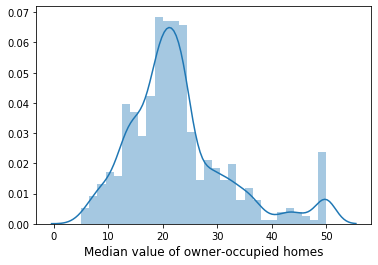

In [9]:
# 连续性数据使用seaborn的distplot方法画直方图，查看数据分布，离散型数据使用sns.countplot查看数据分布
fig = plt.figure()
sns.distplot(df["MEDV"],bins=30,kde=True)
plt.xlabel("Median value of owner-occupied homes", fontsize=12)
plt.show()

从上面的直方图可以看出，图形接近于正态分布，数据主要集中在20左右，左侧比较密集，右侧比较分散，当值为50时，样本数增加，可以判断为噪声将其去除。
对于价格类数值，人类的感受复核log变换（当价格越高，敏感度越低），log变换可以使用numpy的log1p函数

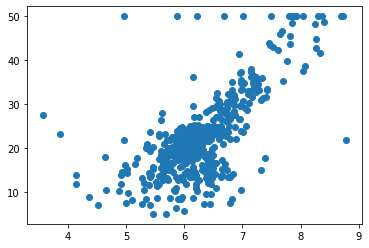

In [10]:
# 连续型数值，也可以使用散点图查看数据分布方法有两个：matplotlib库的scatter()方法 或 seaborn库的jointplot方法（kind参数为scatter）
#使用matplotlib的scatter方法，画出散点图如下：
plt.scatter(df["RM"],df["MEDV"]) #分别为x轴和y轴

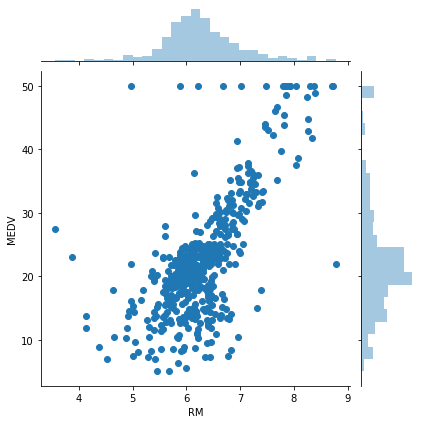

In [11]:
# 使用seaborn的jointplot方法话散点图如下：
sns.jointplot(x="RM",y="MEDV",data=df,kind="scatter")

从上面的散点图可以看出，数据分布具有线性化特征，但是在MEDV为50处，有部分噪声

第二题：对于两个连续型特征，主要有两种方法判断其相关性：相关矩阵和散点图，散点图的方式如上图所示，相关矩阵代码如下：

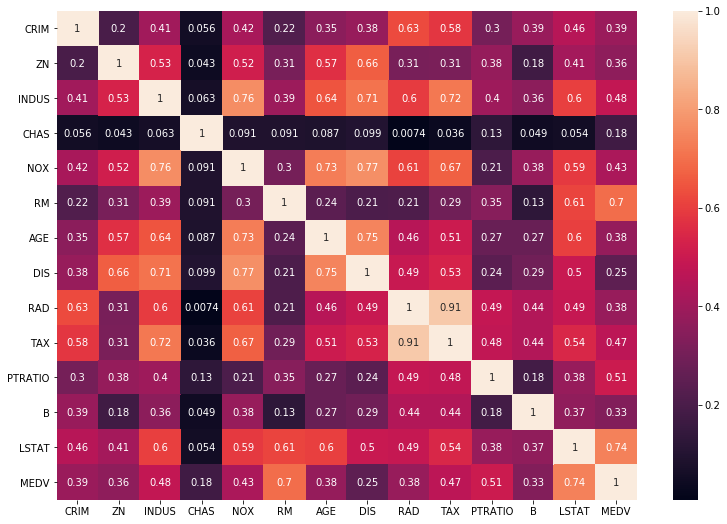

In [12]:
#使用相关矩阵判断两个连续型特征相关性
data_corr = df.corr()
# 相关系数有正有负，我们对相关系数取绝对值，通常认为相关系数的绝对值大于0.5的特征为强相关
data_corr = data_corr.abs()
plt.subplots(figsize=(13, 9)) # subplots对应的参数还没搞太清楚，需要下来继续学习
sns.heatmap(data_corr,annot=True)
# Mask unimportant features,突出重要信息
sns.heatmap(data_corr, mask=data_corr < 0.5, cbar=False)

#plt.savefig("house_coor.png" )
plt.show()

第三题：当发现特征直接有较强相关性后，在选择线性回归模型时，要先对数据做特征化工程。
对原始特征做必要的数据预处理和特征编码，使得变换后的特征符合模型要求。
特征工程主要包括：
1. 数据去噪（如：MEDV中等于50的噪声需要去除）；
2. 数据分离（从原始数据中分离出特征x和标签y）；
3. 特征编码（离散型数据需要进行独热编码（one-hot encode），通过pandas的get_dummies方法（哑编码）或者Scikit-Learn中的OneHotEncoder类，将原来有K种取值的离散型特征变成K维0-1编码特征）；
4. 数值型特征预处理（在数值型特征中，如果发现各特征差异较大，需要进行数据标准化预处理，避免原始特征值差异过大，导致训练得到的参数权重单位不一致，无法比较各特征的重要性，同时一些优化算法（如随机梯度下降及其改进版本）只在各特征尺度差不多的情况下才能保证收敛）。

第四题：在数据特征标准化（去量纲）预处理中，常用的是StandardScaler，针对稀疏结果，也可以使用MinMaxScaler去量纲。下面是做完数据可视化之和，进行特征工程的详细步骤：

In [18]:
'''
特征工程
'''

###########################################
#              1.数据去噪                  #
###########################################
# 删除y大于等于50的样本（保留小于50的样本）
df = df[df.MEDV < 50]

#输出样本数和特征维数
print(df.shape)



(490, 14)


In [19]:
###########################################
#              2.数据分离                  #
###########################################


# 从原始数据中分离输入特征x和输出y
y = df['MEDV']
X = df.drop('MEDV', axis = 1)

# 尝试对y（房屋价格）做log变换，对log变换后的价格进行估计
log_y = np.log1p(y)


In [20]:
###########################################
#              3.离散型特征编码             #
###########################################
# RAD的含义是距离高速公路的便利指数。虽然给的数值是数值型，但实际是索引，可换成离散特征/类别型特征编码试试。
X["RAD"].astype("object")
X_cat = X["RAD"]
X_cat = pd.get_dummies(X_cat, prefix="RAD")

X = X.drop("RAD", axis = 1)

#特征名称，用于保存特征工程结果
feat_names = X.columns

X_cat.head()

RAD_1  RAD_2  RAD_3  RAD_4  RAD_5  RAD_6  RAD_7  RAD_8  RAD_24
0      1      0      0      0      0      0      0      0       0
1      0      1      0      0      0      0      0      0       0
2      0      1      0      0      0      0      0      0       0
3      0      0      1      0      0      0      0      0       0
4      0      0      1      0      0      0      0      0       0

In [27]:
###########################################
#              4.数值型特征标准化           #
###########################################
#使用MinMaxScaler去量纲，导入函数
from sklearn.preprocessing import MinMaxScaler 

#分别初始化特征值x和目标值y的标准化对象
mms_X = MinMaxScaler()
mms_y = MinMaxScaler()

mms_log_y = MinMaxScaler()

# 分别对训练和测试数据的特征以及目标值进行标准化处理
# 对训练数据，要先调用fit方法训练模型，得到模型参数；然后对训练数据和测试数据进行transform
X = mms_X.fit_transform(X)

# 对y做标准化不是必须的
# 对y做标准化的好处是不同问题的w差异不太大，同时正则参数的范围也有限

#对y做标准化不是必须
#对y标准化的好处是不同问题的w差异不太大，同时正则参数的范围也有限
y = mms_y.fit_transform(y.reshape(-1, 1))
log_y = mms_y.fit_transform(log_y.reshape(-1, 1))

In [30]:
'''
保存特征工程的结果到文件，供机器学习模型使用
'''
fe_mms_data = pd.DataFrame(data=X, columns=feat_names, index=df.index)
fe_mms_data = pd.concat([fe_mms_data, X_cat], axis=1, ignore_index=False)

#加上标签y
fe_mms_data["MEDV"] = y
fe_mms_data["log_MEDV"] = log_y

#保存结果到文件
fe_mms_data.to_csv('FE_mms_boston_housing.csv', index=False)

#显示头5行
fe_mms_data.head()

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.058148   0.0  0.314815  0.577505  0.641607  0.268711   
1  0.000236  0.00  0.234444   0.0  0.172840  0.547998  0.782698  0.348524   
2  0.000236  0.00  0.234444   0.0  0.172840  0.694386  0.599382  0.348524   
3  0.000293  0.00  0.053333   0.0  0.150206  0.658555  0.441813  0.448173   
4  0.000705  0.00  0.053333   0.0  0.150206  0.687105  0.528321  0.448173   

        TAX  PTRATIO  ...  RAD_2  RAD_3  RAD_4  RAD_5  RAD_6  RAD_7  RAD_8  \
0  0.208015      0.3  ...      0      0      0      0      0      0      0   
1  0.104962      0.5  ...      1      0      0      0      0      0      0   
2  0.104962      0.5  ...      1      0      0      0      0      0      0   
3  0.066794      0.6  ...      0      1      0      0      0      0      0   
4  0.066794      0.6  ...      0      1      0      0      0      0      0   

   RAD_24      MEDV  log_MEDV  
0       0  0.433790  0.674359  
1       0  0.378995  0.626668  
2       0  0.678082  0.842711  
3       0  0.648402  0.825183  
4       0  0.712329  0.862159  

[5 rows x 23 columns]

In [32]:
# 显示标准化后数据统计信息
fe_mms_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 505
Data columns (total 23 columns):
CRIM        490 non-null float64
ZN          490 non-null float64
INDUS       490 non-null float64
CHAS        490 non-null float64
NOX         490 non-null float64
RM          490 non-null float64
AGE         490 non-null float64
DIS         490 non-null float64
TAX         490 non-null float64
PTRATIO     490 non-null float64
B           490 non-null float64
LSTAT       490 non-null float64
RAD_1       490 non-null uint8
RAD_2       490 non-null uint8
RAD_3       490 non-null uint8
RAD_4       490 non-null uint8
RAD_5       490 non-null uint8
RAD_6       490 non-null uint8
RAD_7       490 non-null uint8
RAD_8       490 non-null uint8
RAD_24      490 non-null uint8
MEDV        490 non-null float64
log_MEDV    490 non-null float64
dtypes: float64(14), uint8(9)
memory usage: 61.7 KB


In [36]:
'''
重新准备数据
'''
#重新打开标准化后的数据文件
df = pd.read_csv("FE_mms_boston_housing.csv")
#从原始数据中分离出特征X和输出y
y = df["MEDV"]
X = df.drop(["MEDV","log_MEDV"],axis = 1)

#特征名称，用于后续显示权重系数对应的特征
feat_names = X.columns

'''
采用交叉验证，将数据分割训练数据与测试数据
'''
#导入train_test_split
from sklearn.model_selection import train_test_split

# 随机采样20%的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2)

In [38]:
###########################################
#              训练最小二乘回归             #
###########################################
from sklearn.linear_model import LinearRegression

#初始化机器学习实例
lr = LinearRegression()

#用训练数据训练模型参数
lr.fit(X_train, y_train)

#用训练好的模型对测试集进行预测
y_test_pred_lr = lr.predict(X_test)
y_train_pred_lr = lr.predict(X_train)

#查看训练后求解出的各特征的权重系数，系数的绝对值大学可视为该特征的重要性
fs = pd.DataFrame({"columns":list(feat_names),"coef":list(lr.coef_.T)})
fs.sort_values(by=['coef'],ascending=False)


columns      coef
5        RM  0.446699
1        ZN  0.104658
20   RAD_24  0.061897
10        B  0.041508
19    RAD_8  0.039532
18    RAD_7  0.033091
14    RAD_3  0.021226
3      CHAS  0.008079
16    RAD_5 -0.011200
15    RAD_4 -0.013261
13    RAD_2 -0.020636
2     INDUS -0.024599
6       AGE -0.041786
12    RAD_1 -0.054486
17    RAD_6 -0.056163
8       TAX -0.109003
4       NOX -0.114821
9   PTRATIO -0.180497
0      CRIM -0.191897
7       DIS -0.331288
11    LSTAT -0.345060

In [44]:
'''
模型评价
'''
from sklearn.metrics import r2_score  #评价回归预测模型的性能

# 使用r2_score评价模型在测试集和训练集上的性能，并输出评估结果
#测试集
print(f'The r2 score of LinearRegression on test is {r2_score(y_test, y_test_pred_lr)}')
#训练集
print(f'The r2 score of LinearRegression on train is {r2_score(y_train, y_train_pred_lr)}')

The r2 score of LinearRegression on test is 0.691834670320638
The r2 score of LinearRegression on train is 0.8001507257439993


从上面r2 score可以看出，最小二乘回归存在过拟合的情况

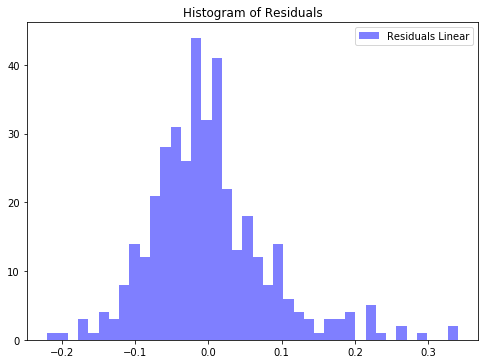

In [46]:
#在训练集上观察预测残差的分布，看是否符合模型假设：噪声为0均值的高斯噪声
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(y_train - y_train_pred_lr, bins=40, label='Residuals Linear', color='b', alpha=.5); 
ax.set_title("Histogram of Residuals") 
ax.legend(loc='best');

从上图看出，残差分布和高斯分布比较匹配，但还是大值这边的尾巴更长

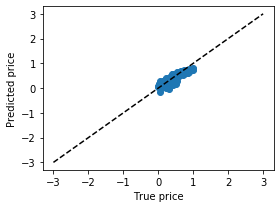

In [47]:
#还可以观察预测值与真值的散点图
plt.figure(figsize=(4, 3))
plt.scatter(y_train, y_train_pred_lr)
plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()

从上图可以看出，使用MinMaxScaler标准化，预测结果好于StandardScaler，样本数据中，存在较多稀疏数据

In [51]:
###########################################
#              使用岭回归训练               #
###########################################
#岭回归／L2正则
#class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, 
#                                  normalize=False, scoring=None, cv=None, gcv_mode=None, 
#                                  store_cv_values=False)
from sklearn.linear_model import  RidgeCV

#1. 设置超参数（正则参数）范围
alphas = [ 0.01, 0.1, 1, 10,100]
#n_alphas = 20
#alphas = np.logspace(-5,2,n_alphas)

#2. 生成一个RidgeCV实例
ridge = RidgeCV(alphas=alphas, store_cv_values=True)  

#3. 模型训练
ridge.fit(X_train, y_train)    

#4. 预测
y_test_pred_ridge = ridge.predict(X_test)
y_train_pred_ridge = ridge.predict(X_train)


# 评估，使用r2_score评价模型在测试集和训练集上的性能
print(f'The r2 score of RidgeCV on test is {r2_score(y_test, y_test_pred_ridge)}')
print(f'The r2 score of RidgeCV on train is {r2_score(y_train, y_train_pred_ridge)}')

The r2 score of RidgeCV on test is 0.6932533010598585
The r2 score of RidgeCV on train is 0.8000790186112845


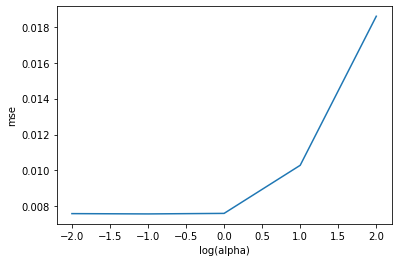

alpha is: 0.1


In [53]:
mse_mean = np.mean(ridge.cv_values_, axis = 0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1)) 

#这是为了标出最佳参数的位置，不是必须
#plt.plot(np.log10(ridge.alpha_)*np.ones(3), [0.28, 0.29, 0.30])

plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:', ridge.alpha_)

In [54]:
# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(feat_names), "coef_lr":list((lr.coef_.T)), "coef_ridge":list((ridge.coef_.T))})
fs.sort_values(by=['coef_lr'],ascending=False)

columns   coef_lr  coef_ridge
5        RM  0.446699    0.440948
1        ZN  0.104658    0.101971
20   RAD_24  0.061897    0.058989
10        B  0.041508    0.041514
19    RAD_8  0.039532    0.039682
18    RAD_7  0.033091    0.032474
14    RAD_3  0.021226    0.021768
3      CHAS  0.008079    0.008555
16    RAD_5 -0.011200   -0.010714
15    RAD_4 -0.013261   -0.013318
13    RAD_2 -0.020636   -0.018895
2     INDUS -0.024599   -0.025797
6       AGE -0.041786   -0.041070
12    RAD_1 -0.054486   -0.054392
17    RAD_6 -0.056163   -0.055594
8       TAX -0.109003   -0.106944
4       NOX -0.114821   -0.110663
9   PTRATIO -0.180497   -0.179602
0      CRIM -0.191897   -0.178385
7       DIS -0.331288   -0.321298
11    LSTAT -0.345060   -0.345639

In [55]:
###########################################
#              使用Lasso训练               #
###########################################
#### Lasso／L1正则
# class sklearn.linear_model.LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, 
#                                    normalize=False, precompute=’auto’, max_iter=1000, 
#                                    tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=1,
#                                    positive=False, random_state=None, selection=’cyclic’)
from sklearn.linear_model import LassoCV

#1. 设置超参数搜索范围
#alphas = [ 0.01, 0.1, 1, 10,100]

#2. 生成学习器实例
#lasso = LassoCV(alphas=alphas)

#1. 设置超参数搜索范围
#Lasso可以自动确定最大的alpha，所以另一种设置alpha的方式是设置最小的alpha值（eps） 和 超参数的数目（n_alphas），
#然后LassoCV对最小值和最大值之间在log域上均匀取值n_alphas个
# np.logspace(np.log10(alpha_max * eps), np.log10(alpha_max),num=n_alphas)[::-1]

#2 生成LassoCV实例（默认超参数搜索范围）
lasso = LassoCV()  

#3. 训练（内含CV）
lasso.fit(X_train, y_train)  

#4. 测试
y_test_pred_lasso = lasso.predict(X_test)
y_train_pred_lasso = lasso.predict(X_train)


# 评估，使用r2_score评价模型在测试集和训练集上的性能
print(f'The r2 score of LassoCV on test is {r2_score(y_test, y_test_pred_lasso)}')
print(f'The r2 score of LassoCV on train is {r2_score(y_train, y_train_pred_lasso)}')

The r2 score of LassoCV on test is 0.6472444626686267
The r2 score of LassoCV on train is 0.7907259003564621


/home/leon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


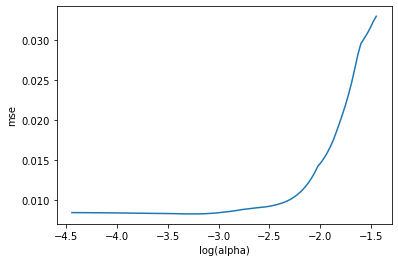

alpha is: 0.0005447049278906209


In [56]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)

In [57]:
# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(feat_names), "coef_lr":list((lr.coef_.T)), "coef_ridge":list((ridge.coef_.T)), "coef_lasso":list((lasso.coef_.T))})
fs.sort_values(by=['coef_lr'],ascending=False)

columns   coef_lr  coef_ridge  coef_lasso
5        RM  0.446699    0.440948    0.453778
1        ZN  0.104658    0.101971    0.064915
20   RAD_24  0.061897    0.058989    0.008406
10        B  0.041508    0.041514    0.028353
19    RAD_8  0.039532    0.039682    0.031060
18    RAD_7  0.033091    0.032474    0.016817
14    RAD_3  0.021226    0.021768    0.029484
3      CHAS  0.008079    0.008555    0.005649
16    RAD_5 -0.011200   -0.010714   -0.000000
15    RAD_4 -0.013261   -0.013318   -0.007142
13    RAD_2 -0.020636   -0.018895   -0.000000
2     INDUS -0.024599   -0.025797   -0.020070
6       AGE -0.041786   -0.041070   -0.026738
12    RAD_1 -0.054486   -0.054392   -0.034440
17    RAD_6 -0.056163   -0.055594   -0.036786
8       TAX -0.109003   -0.106944   -0.066986
4       NOX -0.114821   -0.110663   -0.068198
9   PTRATIO -0.180497   -0.179602   -0.161135
0      CRIM -0.191897   -0.178385   -0.000000
7       DIS -0.331288   -0.321298   -0.213980
11    LSTAT -0.345060   -0.345639   -0.367637

第五题：
岭回归：L2损失 + L2正则，大部分场合都适合岭回归，尤其是高相关性的情况，L2正则参数越大，收敛越快，可以有效得降低模型复杂度，其优点是处处可导，方便优化计算，但同时对于噪声也非常敏感。
Lasso：L2损失 + L1正则，岭回归与Lasso回归最大的区别在于岭回归引入的是L2正则，Lasso回归引入的是L1正则，可以减少共线性的影响，计算量Lasso回归将远远小于岭回归。
最小二乘：没有正则项，建模快速简单，特别适用于要建模的关系不是非常复杂且数据量不大的情况，但因为缺少正则项，容易产生过拟合

参考链接：
http://www.sohu.com/a/249214202_814235